In [1]:
# !pip install matplotlib
# !pip install numpy
# !pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
#read the data set
df = pd.read_csv('Dataset/Airbnb_Data.csv')

In [5]:
#replace the log price column with the price column

df['log_price'] = df['log_price'].apply(lambda x: np.exp(x))

#rename the log price column to price

df.rename(columns={'log_price':'price'}, inplace=True)

In [6]:
#used to get the top amenities
copy_df=df.copy()
copy_df['amenities'] = copy_df['amenities'].apply(lambda x: x.replace('{','').replace('}','').replace('"','').split(','))

In [7]:
#make the amenities column a string
df['amenities'] = df['amenities'].apply(lambda x: x.replace('{','').replace('}','').replace('"','').replace(',',' '))
print(df['amenities'].head())

0    Wireless Internet Air conditioning Kitchen Hea...
1    Wireless Internet Air conditioning Kitchen Hea...
2    TV Cable TV Wireless Internet Air conditioning...
3    TV Cable TV Internet Wireless Internet Kitchen...
4    TV Internet Wireless Internet Air conditioning...
Name: amenities, dtype: object


In [8]:
#make a single string of all the amenities
text = " ".join(amenities for amenities in df.amenities)

# The Most Frequent Amenities

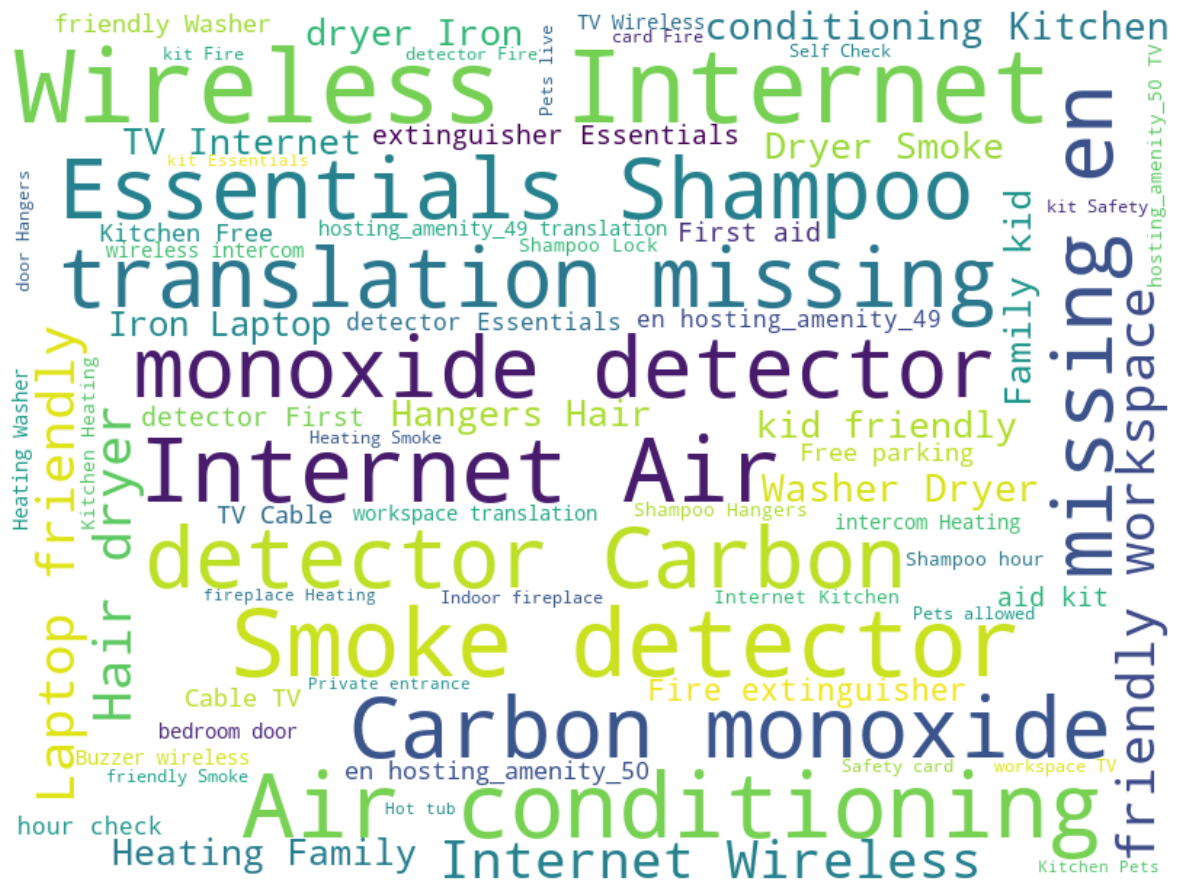

In [9]:
# Start with one review:
# text = df['amenities']

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=600,max_font_size=70, max_words=70,background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Heatmap 

In [89]:
#get the correlation of the room type and price
df_corr = df[['accommodates','bathrooms', 'beds','bedrooms','price']].corr()

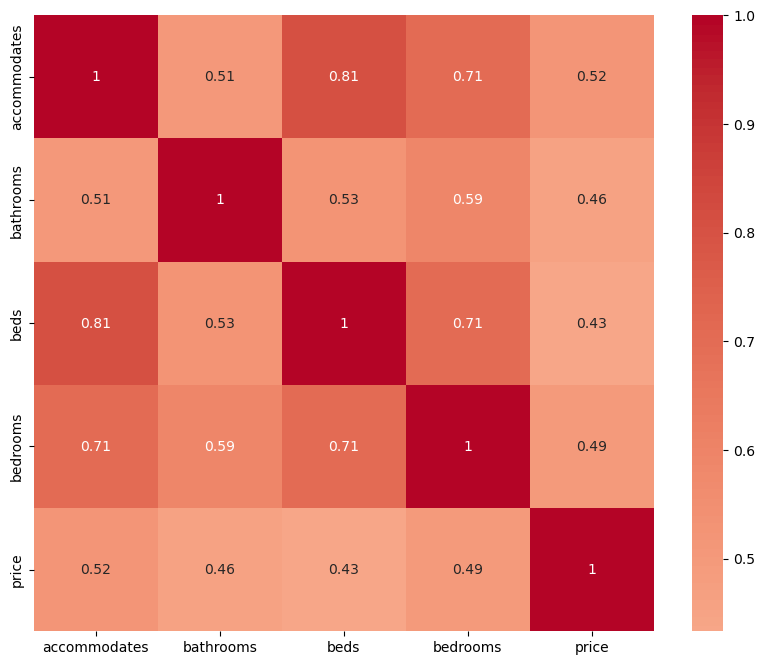

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_corr is your correlation DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', center=0)
plt.show()

In [81]:
df_corr

,accommodates,bathrooms,beds,price,bedrooms
accommodates,1.000000,0.505632,0.810801,0.519326,0.709258
bathrooms,0.505632,1.000000,0.525591,0.459350,0.589935
beds,0.810801,0.525591,1.000000,0.433162,0.709416
price,0.519326,0.459350,0.433162,1.000000,0.494437
bedrooms,0.709258,0.589935,0.709416,0.494437,1.000000


### Heatmap between property_type and room_type, with the average price as the heat value

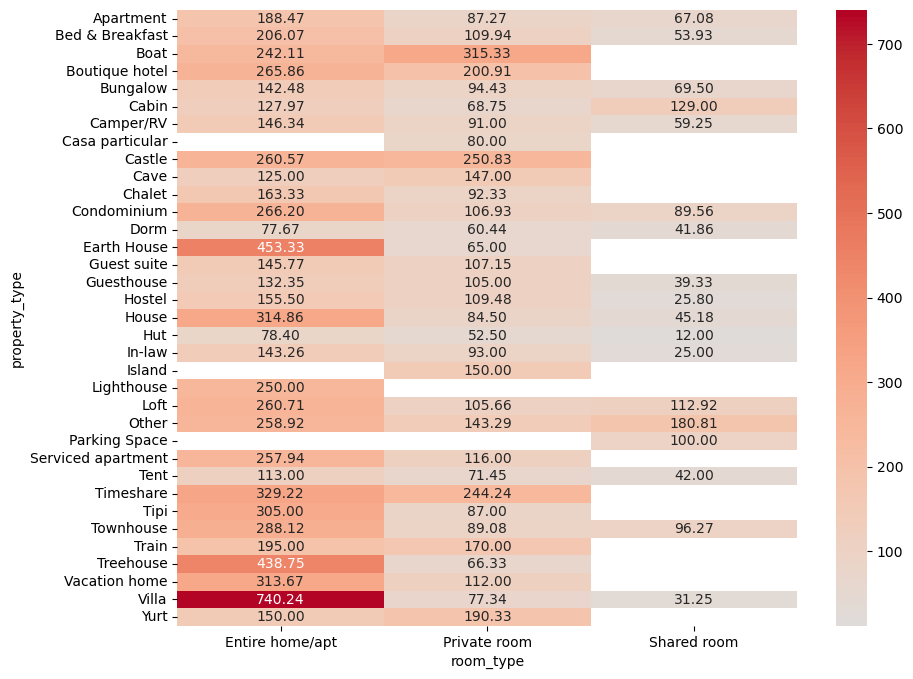

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and "property_type", "room_type" are your categorical columns
# and "price" is your numerical column

# Create a pivot table
pivot_table = pd.pivot_table(df, values='price', index='property_type', columns='room_type', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', center=0, fmt=".2f", annot_kws={'size':10})
plt.show()

# Neighborhood

In [12]:
neighborhood = df['neighbourhood'].value_counts()
print(neighborhood)

neighbourhood
Williamsburg          2862
Bedford-Stuyvesant    2166
Bushwick              1601
Upper West Side       1396
Mid-Wilshire          1392
                      ... 
Mill Basin               1
Mt. Vernon Square        1
Chevy Chase, MD          1
Clearing                 1
Grant City               1
Name: count, Length: 619, dtype: int64


# Count of airbnb per each city

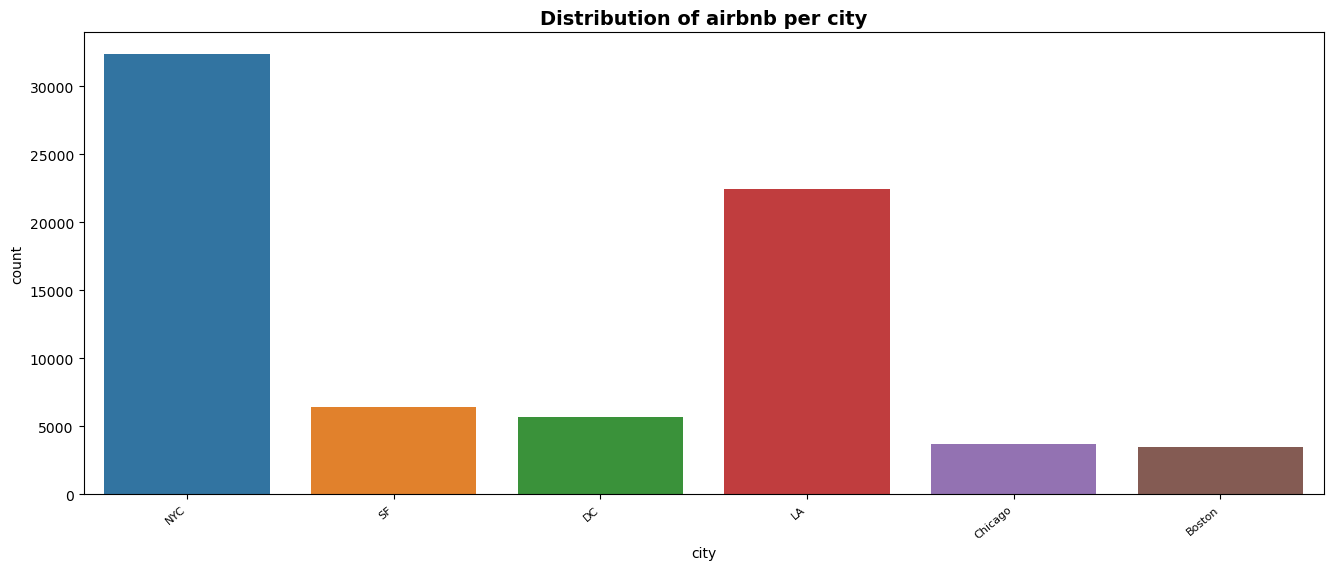

In [13]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x='city', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Distribution of airbnb per city', fontsize=14, fontweight='bold')
plt.show()

In [14]:
# #for each city find the distribution of airbnb per neighborhood
# for city in df['city'].unique():
#     plt.figure(figsize=(16,6))
#     ax = sns.countplot(x='neighbourhood', data=df[df['city']==city])
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
#     plt.title('Distribution of airbnb per neighborhood in '+city, fontsize=14, fontweight='bold')
#     plt.show()

Top 3 neighbourhoods (in airbnb count) in each city

In [55]:
# Group by 'city' and 'neighbourhood', get the size, and reset the index
df_count = df.groupby(['city','neighbourhood']).size().reset_index(name='count')

# Sort the data and get the top 4 neighbourhoods in each city
top_neighbourhoods = df_count.groupby('city').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

top_neighbourhoods

#plot the top 3 neighborhoods in each city using barh
#sort the plots by count in descending order
# plt.figure(figsize=(16,6))
# ax = sns.barplot(x='count', y='neighbourhood', data=top_neighbourhoods, hue='city')
# plt.title('Top 3 neighborhoods in each city', fontsize=14, fontweight='bold')
# plt.show()


,city,neighbourhood,count
0,Boston,Allston-Brighton,414
1,Boston,Jamaica Plain,308
2,Boston,Back Bay,296
3,Chicago,Lakeview,258
4,Chicago,Logan Square,213
5,Chicago,Lincoln Park,157
6,DC,Capitol Hill,526
7,DC,Columbia Heights,298
8,DC,Near Northeast/H Street Corridor,271
9,LA,Mid-Wilshire,1392


## Top 15 neighborhoods among all cities

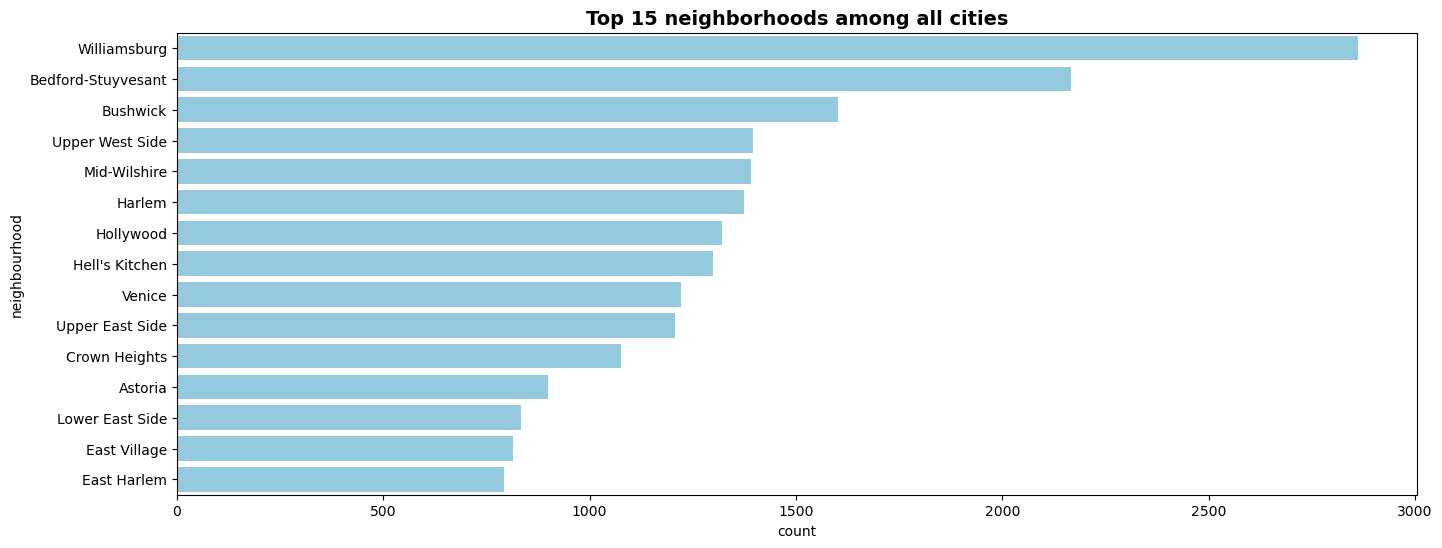

In [74]:
#plotting the top 15 neighborhoods in all of the df using barplot

plt.figure(figsize=(16,6))
ax = sns.barplot(x='count', y='neighbourhood', data=df_count.nlargest(15, 'count'),color='skyblue')
plt.title('Top 15 neighborhoods among all cities', fontsize=14, fontweight='bold')
plt.show()

# Avg price of each city

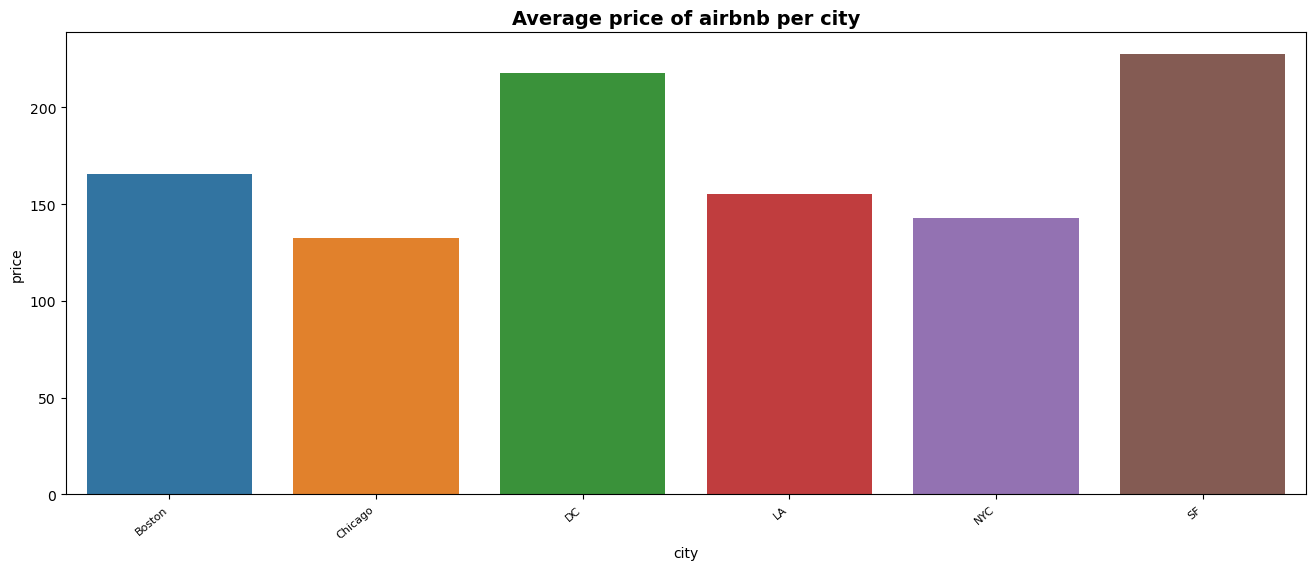

In [16]:
#avg price of each city
df_avg_price = df.groupby('city')['price'].mean().reset_index()
#plot
plt.figure(figsize=(16,6))
ax = sns.barplot(x='city', y='price', data=df_avg_price)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Average price of airbnb per city', fontsize=14, fontweight='bold')
plt.show()

# Top 3 neighbourhoods (highest average price) in each city

In [17]:
# Group by 'city' and 'neighbourhood', get the mean price, and reset the index
df_avg_price = df.groupby(['city','neighbourhood'])['price'].mean().reset_index()

# Sort the data and get the top 3 neighbourhoods in each city based on average price
top_neighbourhoods_price = df_avg_price.groupby('city').apply(lambda x: x.nlargest(3, 'price')).reset_index(drop=True)

top_neighbourhoods_price

,city,neighbourhood,price
0,Boston,Cambridge,324.500000
1,Boston,Downtown,289.764706
2,Boston,Chinatown,268.021505
3,Chicago,Old Town,214.694444
4,Chicago,Wrigleyville,213.452381
5,Chicago,River West,202.058824
6,DC,"Chevy Chase, MD",1250.000000
7,DC,Observatory Circle,825.000000
8,DC,Bellevue,671.666667
9,LA,Wilmington,1300.000000


visualize it

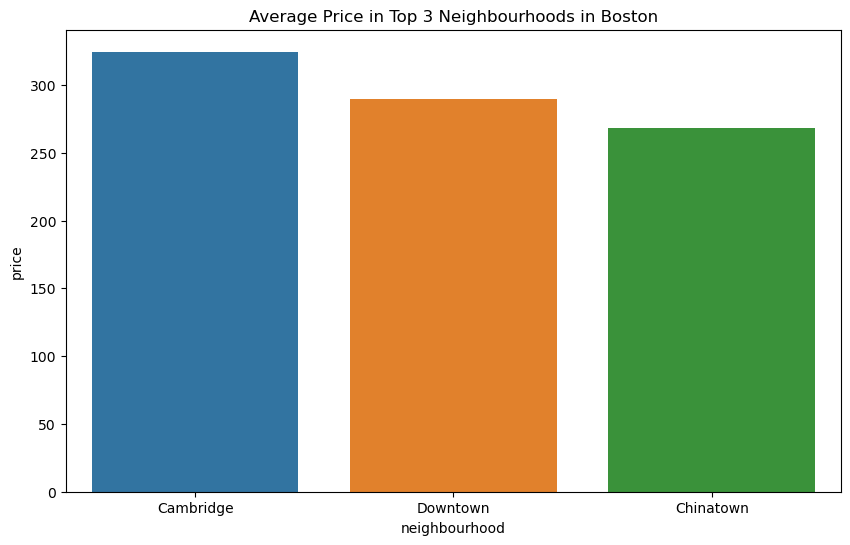

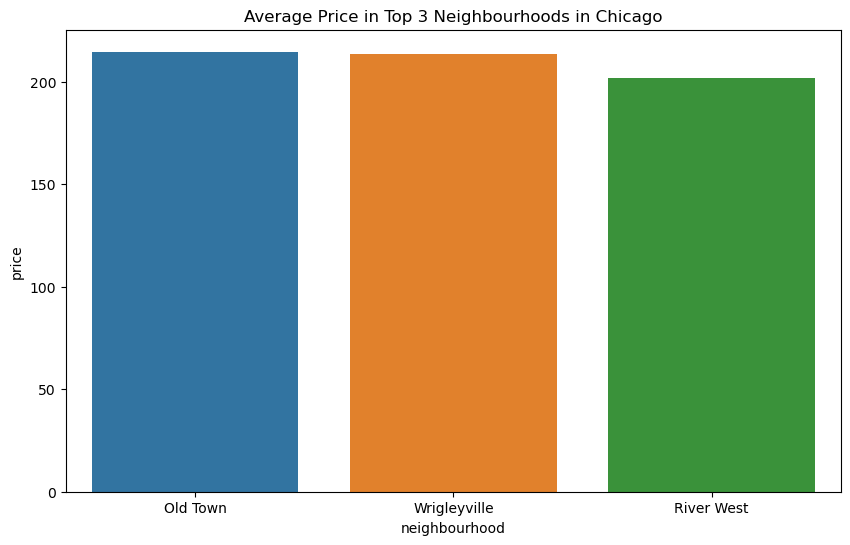

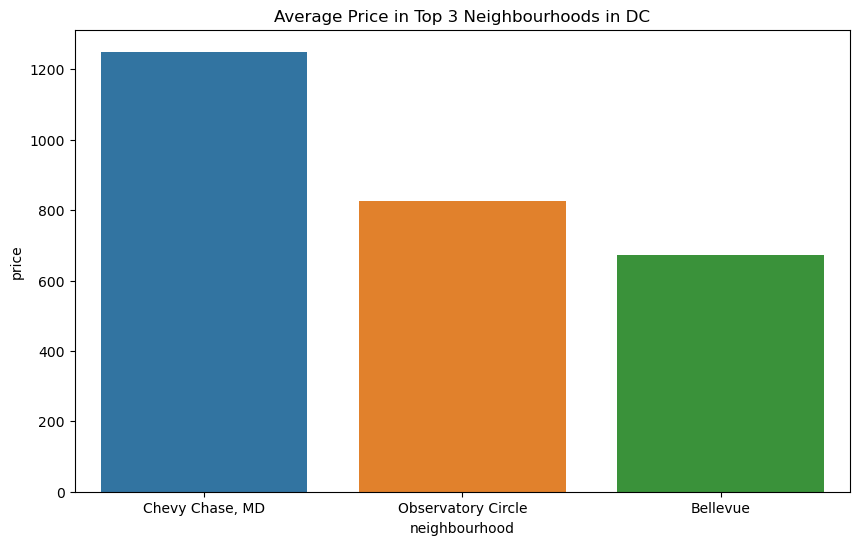

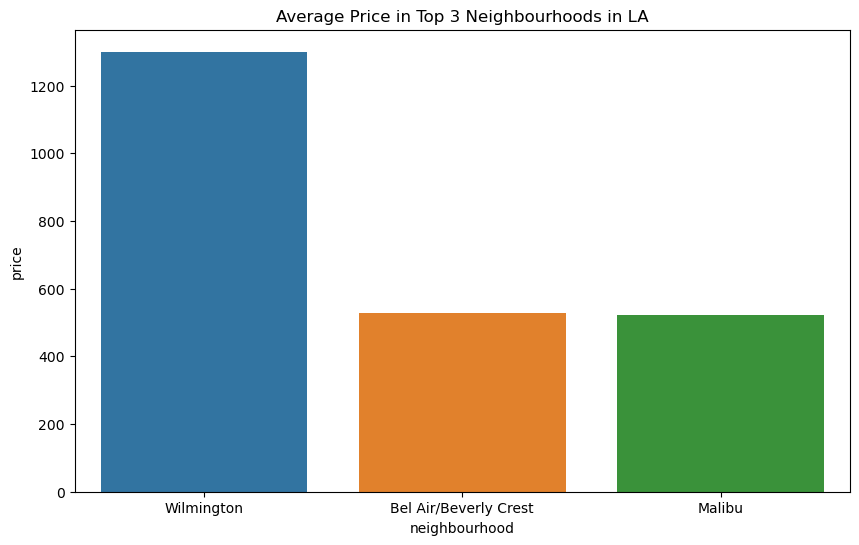

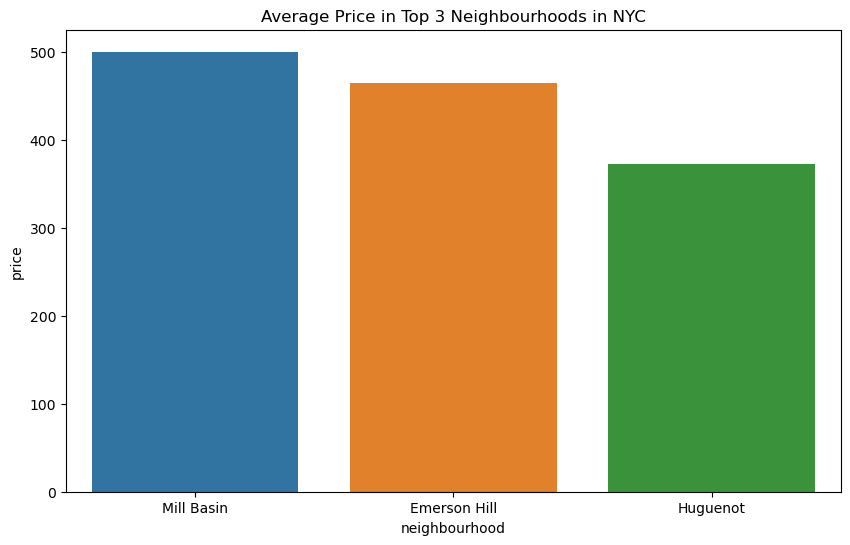

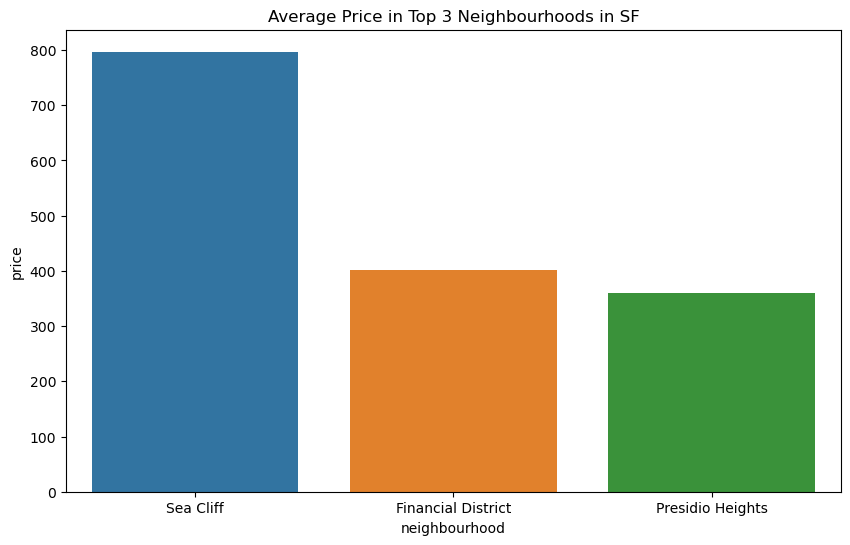

In [18]:
# Get the unique cities
cities = top_neighbourhoods_price['city'].unique()

# Create a bar plot for each city
for city in cities:
    # Filter the data for the current city
    data = top_neighbourhoods_price[top_neighbourhoods_price['city'] == city]
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='neighbourhood', y='price', data=data)
    plt.title(f'Average Price in Top 3 Neighbourhoods in {city}')
    plt.show()

In [19]:
# Group by 'city' and 'neighbourhood', get the mean price, and reset the index
df_avg_price = df.groupby(['city','neighbourhood'])['price'].mean().reset_index()

# Find the neighbourhood with the maximum average price in each city
max_price_neighbourhoods = df_avg_price.loc[df_avg_price.groupby('city')['price'].idxmax()].reset_index(drop=True)

# Find the neighbourhood with the minimum average price in each city
min_price_neighbourhoods = df_avg_price.loc[df_avg_price.groupby('city')['price'].idxmin()].reset_index(drop=True)

max_price_neighbourhoods, min_price_neighbourhoods

(      city    neighbourhood        price
 0   Boston        Cambridge   324.500000
 1  Chicago         Old Town   214.694444
 2       DC  Chevy Chase, MD  1250.000000
 3       LA       Wilmington  1300.000000
 4      NYC       Mill Basin   500.000000
 5       SF        Sea Cliff   797.000000,
       city             neighbourhood       price
 0   Boston                Somerville   54.000000
 1  Chicago             South Chicago   25.000000
 2       DC  Suitland-Silver Hill, MD   37.000000
 3       LA                 La Puente   40.000000
 4      NYC               Morris Park   43.600000
 5       SF               West Portal  124.636364)

# Amenities in the top 3 expensive airbnb

In [21]:
# get the unique amenities in the top 3 aibrbnb in price 
copy_df['price'].head()
#get the top airbnb in price
top_airbnb = copy_df.nlargest(3, 'price')['amenities']
print(top_airbnb)
#get the unique amenities
# Flatten the list of amenities
flat_amenities = [item for sublist in top_airbnb for item in sublist]

# Get the unique amenities
unique_amenities = set(flat_amenities)

print(unique_amenities)

19210    [TV, Wireless Internet, Air conditioning, Pool...
42672    [Internet, Wireless Internet, Air conditioning...
55453    [TV, Wireless Internet, Air conditioning, Kitc...
Name: amenities, dtype: object
{'Smoking allowed', 'Pets allowed', 'Gym', 'Fire extinguisher', 'Buzzer/wireless intercom', 'Shampoo', 'Indoor fireplace', 'Pool', 'First aid kit', 'Washer', 'Smoke detector', 'Breakfast', 'Kitchen', 'Air conditioning', 'Laptop friendly workspace', 'Free parking on premises', 'Carbon monoxide detector', 'Hair dryer', 'Suitable for events', 'Essentials', 'Internet', 'Family/kid friendly', 'Private entrance', 'Wireless Internet', 'Iron', 'Lock on bedroom door', 'Hangers', 'Heating', 'Dryer', 'TV'}


### Boxplot between price and number of bedrooms

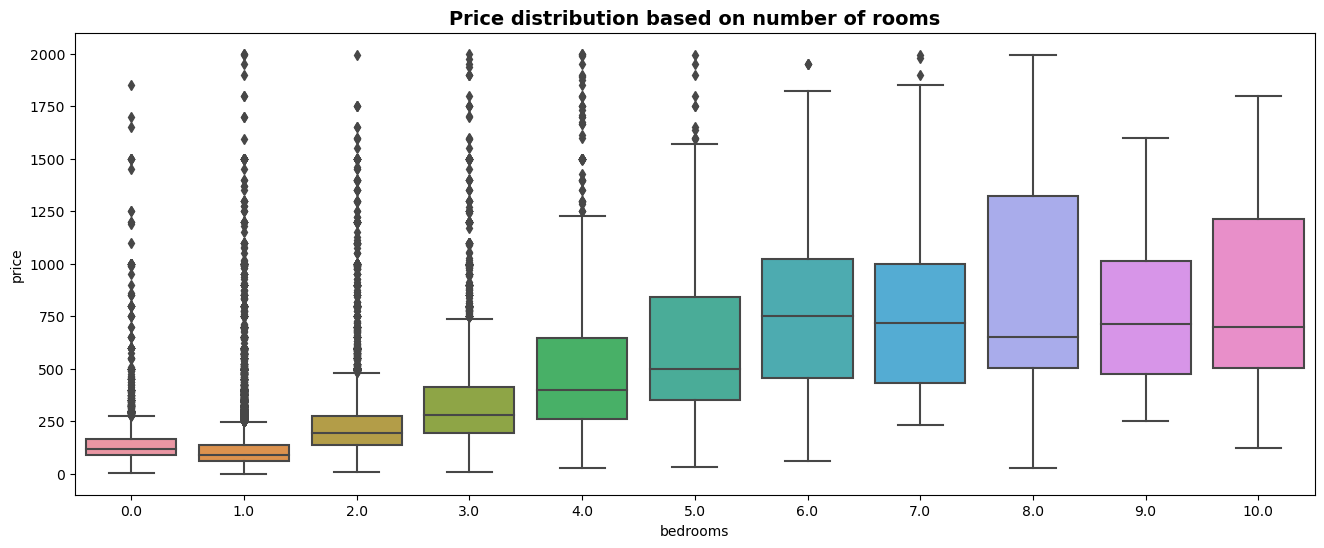

In [26]:
#create a box plot for the price and the number of rooms
plt.figure(figsize=(16,6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price distribution based on number of rooms', fontsize=14, fontweight='bold')
plt.show()

### Boxplot between accommodates and price

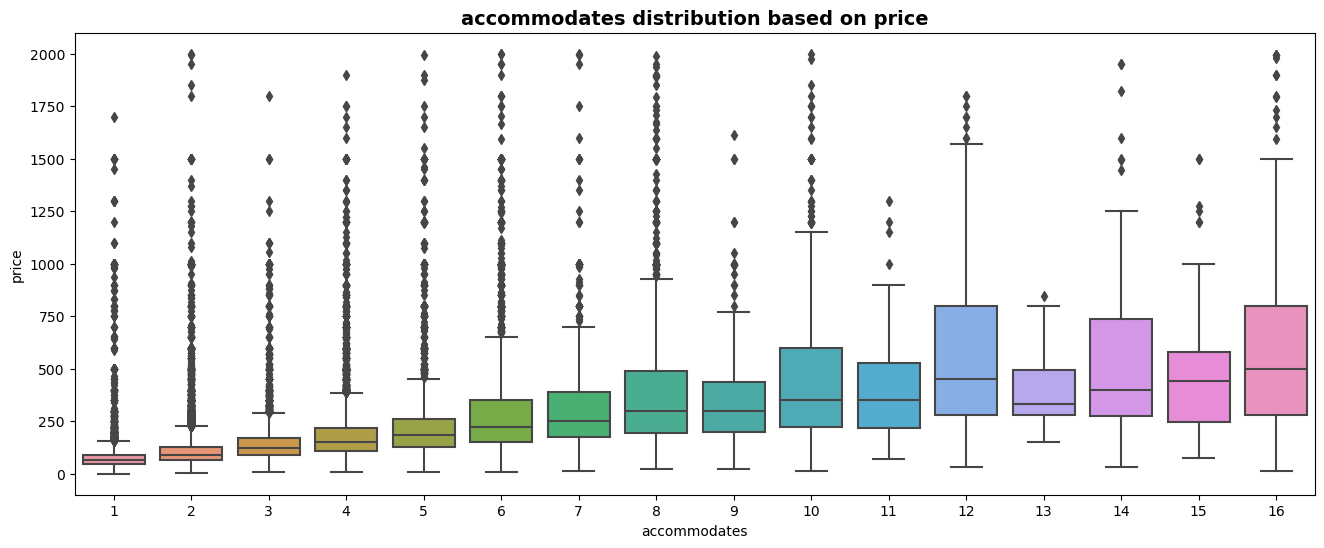

In [42]:
#create a box plot for the price and the number of rooms
plt.figure(figsize=(16,6))
sns.boxplot(x='accommodates', y='price', data=df)
plt.title('accommodates distribution based on price', fontsize=14, fontweight='bold')
plt.show()

### There is no correlation between cancellation_policy and city

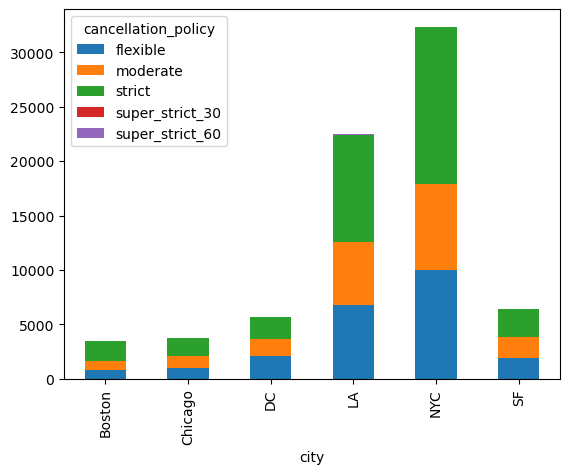

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "cancelation_policy" and "city" are your categorical columns
pivot_df = df.groupby([ 'city','cancellation_policy']).size().unstack()

pivot_df.plot(kind='bar', stacked=True)
plt.show()



### There is no correlation between cancellation_policy and price

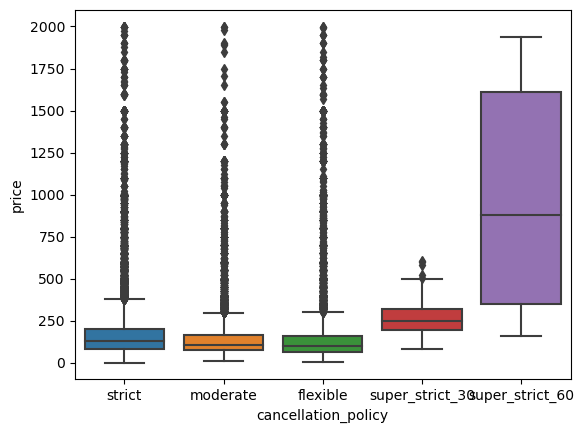

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "cancelation_policy" is your categorical column
# and "price" is your numerical column
sns.boxplot(x="cancellation_policy", y="price", data=df)

plt.show()